In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
root_dir = os.path.dirname(os.path.realpath('./../'))

In [3]:
df_all = pd.read_csv(f"{root_dir}/data/all_data_2exp.csv")
pd.set_option('display.max_columns', None)
df_all.head()

,Unnamed: 0,area_percent,update_time,delta_time,plan_length,replan_count,logging_time,frame_count,known_area,success,seed,draw_sim,log_plots,use_threads,n_bots,grid_thickness,screen_width,screen_height,min_room_size,max_room_size,wall_ratio,method,start_scenario,goal_scenario,experiment_ID,loss_type,execution_date
0,0,0.0716,0.10,0.10,219,12,0.0,0,179,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier_Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32
1,1,0.0880,0.13,0.23,219,18,0.0,1,220,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier_Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32
2,2,0.0964,0.06,0.29,203,20,0.0,2,241,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier_Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32
3,3,0.1056,0.05,0.34,197,21,0.0,3,264,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier_Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32
4,4,0.1152,0.05,0.39,189,22,0.0,4,288,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier_Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32


In [4]:
df_all.shape

(15722, 27)

In [5]:
df_all.columns

Index(['Unnamed: 0', 'area_percent', 'update_time', 'delta_time',
       'plan_length', 'replan_count', 'logging_time', 'frame_count',
       'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
       'n_bots', 'grid_thickness', 'screen_width', 'screen_height',
       'min_room_size', 'max_room_size', 'wall_ratio', 'method',
       'start_scenario', 'goal_scenario', 'experiment_ID', 'loss_type',
       'execution_date'],
      dtype='object')

In [6]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()

In [7]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [8]:
df_all[(df_all['N Bots']==4) & (df_all['Seed']==50) & (df_all['Min Room Size']==40)]

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date
1108,1108,0.0456,0.06,0.06,108,6,0.0,0,114,True,50,False,True,False,4,10,500,500,40,200,0.2688,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,0,Agent,2023-05-02 17:45:32
1109,1109,0.0764,0.03,0.09,104,7,0.0,1,191,True,50,False,True,False,4,10,500,500,40,200,0.2688,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,0,Agent,2023-05-02 17:45:32
1110,1110,0.0884,0.05,0.14,104,10,0.0,2,221,True,50,False,True,False,4,10,500,500,40,200,0.2688,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,0,Agent,2023-05-02 17:45:32
1111,1111,0.1000,0.02,0.16,100,10,0.0,3,250,True,50,False,True,False,4,10,500,500,40,200,0.2688,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,0,Agent,2023-05-02 17:45:32
1112,1112,0.1084,0.02,0.18,96,11,0.0,4,271,True,50,False,True,False,4,10,500,500,40,200,0.2688,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,0,Agent,2023-05-02 17:45:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,13695,0.9996,0.03,12.75,9,534,0.0,235,2499,False,50,False,True,False,4,10,500,500,40,200,0.2688,Voronoi Frontier Closest,Top_Left_Start_Position,Distributed_Goal,64,Agent,2023-05-02 17:45:32
13696,13696,0.9996,0.02,12.77,8,537,0.0,236,2499,False,50,False,True,False,4,10,500,500,40,200,0.2688,Voronoi Frontier Closest,Top_Left_Start_Position,Distributed_Goal,64,Agent,2023-05-02 17:45:32
13697,13697,0.9996,0.03,12.80,7,540,0.0,237,2499,False,50,False,True,False,4,10,500,500,40,200,0.2688,Voronoi Frontier Closest,Top_Left_Start_Position,Distributed_Goal,64,Agent,2023-05-02 17:45:32
13698,13698,0.9996,0.03,12.83,6,543,0.0,238,2499,False,50,False,True,False,4,10,500,500,40,200,0.2688,Voronoi Frontier Closest,Top_Left_Start_Position,Distributed_Goal,64,Agent,2023-05-02 17:45:32


In [9]:
# print the unique method name from the data
df_all['Method']

0                Frontier Closest
1                Frontier Closest
2                Frontier Closest
3                Frontier Closest
4                Frontier Closest
                   ...           
15717    Voronoi Frontier Closest
15718    Voronoi Frontier Closest
15719    Voronoi Frontier Closest
15720    Voronoi Frontier Closest
15721    Voronoi Frontier Closest
Name: Method, Length: 15722, dtype: category
Categories (9, object): ['Decision Frontier Closest', 'Frontier Closest', 'Frontier Random', 'Unknown Closest', ..., 'Voronoi Frontier Closest', 'Voronoi Frontier Help Closest', 'Voronoi Frontier Help Random', 'Voronoi Frontier Random']

In [10]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))
df_all['M'] 

0          F.C.
1          F.C.
2          F.C.
3          F.C.
4          F.C.
          ...  
15717    V.F.C.
15718    V.F.C.
15719    V.F.C.
15720    V.F.C.
15721    V.F.C.
Name: M, Length: 15722, dtype: category
Categories (9, object): ['D.F.C.', 'F.C.', 'F.R.', 'U.C.', ..., 'V.F.C.', 'V.F.H.C.', 'V.F.H.R.', 'V.F.R.']

In [11]:
df_all.head()

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date,M
0,0,0.0716,0.10,0.10,219,12,0.0,0,179,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
1,1,0.0880,0.13,0.23,219,18,0.0,1,220,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
2,2,0.0964,0.06,0.29,203,20,0.0,2,241,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
3,3,0.1056,0.05,0.34,197,21,0.0,3,264,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
4,4,0.1152,0.05,0.39,189,22,0.0,4,288,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.


In [12]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date', 'M'],
      dtype='object')

In [13]:
df_all.shape

(15722, 28)

In [14]:
df_all[df_all['M']=='F.C.']

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date,M
0,0,0.0716,0.10,0.10,219,12,0.0,0,179,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
1,1,0.0880,0.13,0.23,219,18,0.0,1,220,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
2,2,0.0964,0.06,0.29,203,20,0.0,2,241,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
3,3,0.1056,0.05,0.34,197,21,0.0,3,264,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
4,4,0.1152,0.05,0.39,189,22,0.0,4,288,True,51,False,True,False,8,10,500,500,40,200,0.2636,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,6,Agent,2023-05-02 17:45:32,F.C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2145,0.9992,0.06,15.59,134,558,0.0,191,2498,True,51,False,True,False,8,10,500,500,80,200,0.1576,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,7,Agent,2023-05-02 17:45:32,F.C.
2146,2146,0.9992,0.04,15.63,126,558,0.0,192,2498,True,51,False,True,False,8,10,500,500,80,200,0.1576,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,7,Agent,2023-05-02 17:45:32,F.C.
2147,2147,0.9992,0.07,15.70,118,558,0.0,193,2498,True,51,False,True,False,8,10,500,500,80,200,0.1576,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,7,Agent,2023-05-02 17:45:32,F.C.
2148,2148,0.9996,0.06,15.76,110,558,0.0,194,2499,True,51,False,True,False,8,10,500,500,80,200,0.1576,Frontier Closest,Top_Left_Start_Position,Distributed_Goal,7,Agent,2023-05-02 17:45:32,F.C.


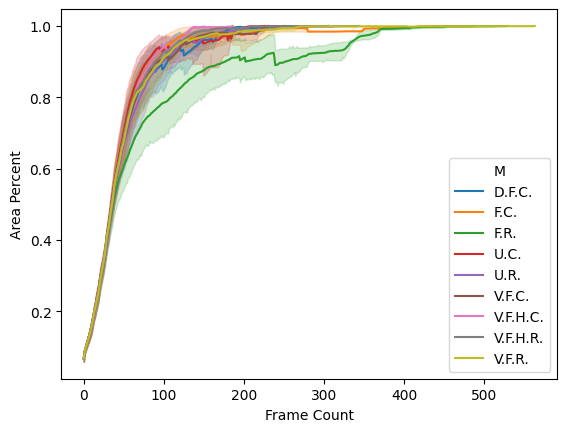

In [15]:
sns.lineplot(x="Frame Count", y='Area Percent', hue="M", data=df_all)

# plt.ylim(0.6, 1)
# plt.xlim(0,200)
# save the plot
os.makedirs(f"{root_dir}/data_analysis/plotting", exist_ok=True)
plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_hue_method.png", dpi=300)


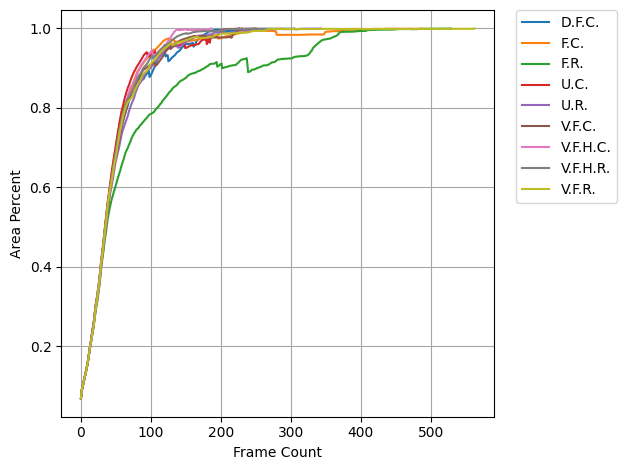

In [16]:
fig, ax = plt.subplots()

for i,[method, group] in enumerate(df_all.groupby(['M'])):
    # group by 'frame_count' column
    count_group = group.groupby(['Frame Count'])
    # plot mean of 'area_percent' against 'frame_count'
    x_data = count_group['Area Percent'].mean()
    plt.plot(x_data, label=method)

# plt.ylim(0.0, 1)
# plt.xlim(0,400)
plt.grid(True, which="both", ls="-", color='0.65')
plt.xlabel('Frame Count')
plt.ylabel('Area Percent')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# save the figure
plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_mean_hue_method.png", dpi=300)

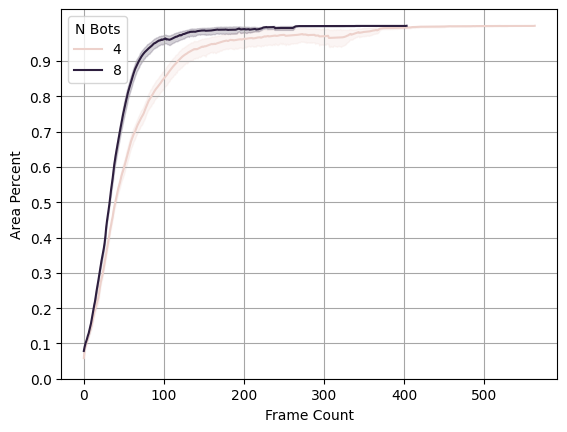

In [17]:
sns.lineplot(x="Frame Count", y="Area Percent", hue="N Bots", data=df_all)
# set y range
# plt.ylim(0.0, 1.0)
# plt.xlim(0, 400)
plt.grid(True, which="both", ls="-", color='0.65')
plt.yticks(np.arange(0, 1, .10))
plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_hue_nbots.png", dpi=300)

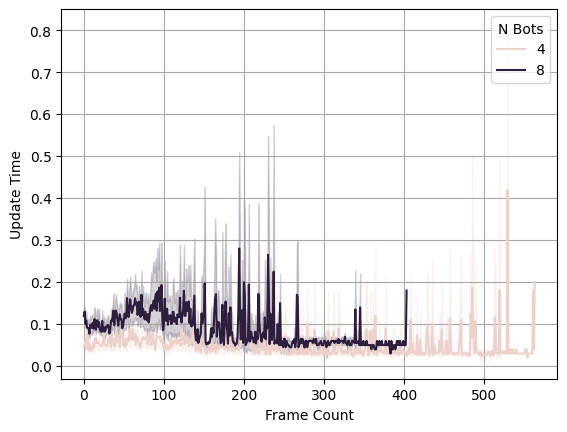

In [18]:
sns.lineplot(data=df_all, x="Frame Count", y="Update Time", hue="N Bots")

plt.grid(True, which="both", ls="-", color='0.65')

plt.savefig(f"{root_dir}/data_analysis/plotting/update_time_vs_frame_count_hue_nbots.png", dpi=300)

In [19]:
# df_all['M'].unique()

In [20]:
# df_all['Experiment Id'].unique()

In [21]:
df_all[['Frame Count']].describe()

,Frame Count
count,15722.000000
mean,137.901476
std,111.619028
min,0.000000
25%,54.000000
50%,110.000000
75%,190.000000
max,563.000000


In [22]:
# The average frame_count for each method
df_all.groupby(['Method']).max()['Frame Count'].sort_values()

/tmp/ipykernel_13672/2164798481.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_all.groupby(['Method']).max()['Frame Count'].sort_values()


Method
Voronoi Frontier Help Closest    186
Decision Frontier Closest        226
Unknown Closest                  230
Voronoi Frontier Closest         250
Voronoi Frontier Help Random     305
Unknown Random                   343
Frontier Closest                 487
Frontier Random                  529
Voronoi Frontier Random          563
Name: Frame Count, dtype: int64

In [23]:
df_all.groupby(['Method'])['Delta Time'].max().sort_values()

Method
Voronoi Frontier Closest         16.50
Frontier Closest                 16.52
Voronoi Frontier Help Random     19.62
Unknown Random                   21.91
Frontier Random                  24.27
Voronoi Frontier Help Closest    24.79
Voronoi Frontier Random          26.25
Decision Frontier Closest        28.50
Unknown Closest                  29.22
Name: Delta Time, dtype: float64

In [24]:
df_all.groupby(['Method']).mean()['Frame Count'].sort_values()

Method
Voronoi Frontier Help Closest     69.468953
Unknown Closest                   80.174576
Decision Frontier Closest         83.456557
Voronoi Frontier Closest         100.632275
Voronoi Frontier Help Random     106.633247
Unknown Random                   129.533126
Frontier Closest                 142.169085
Voronoi Frontier Random          187.141158
Frontier Random                  205.604064
Name: Frame Count, dtype: float64

In [25]:
df_all.groupby(['Method'])['Delta Time'].mean().sort_values()

Method
Frontier Closest                  5.835552
Voronoi Frontier Help Random      6.534780
Decision Frontier Closest         6.790500
Unknown Random                    7.311014
Unknown Closest                   7.611839
Voronoi Frontier Help Closest     8.047331
Voronoi Frontier Closest          8.144398
Frontier Random                   9.323273
Voronoi Frontier Random          10.438684
Name: Delta Time, dtype: float64

In [26]:
df_all.groupby(['Method']).agg({'Delta Time': np.ptp})

,Delta Time
Method,
Decision Frontier Closest,28.45
Frontier Closest,16.50
Frontier Random,24.24
Unknown Closest,29.20
Unknown Random,21.88
Voronoi Frontier Closest,16.47
Voronoi Frontier Help Closest,24.77
Voronoi Frontier Help Random,19.61
Voronoi Frontier Random,26.23


/tmp/ipykernel_13672/3221573873.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="Frame Count", y="Delta Time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_13672/3221573873.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="Frame Count", y="Delta Time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_13672/3221573873.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="Frame Count", y="Delta Time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_13672/3221573873.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="Frame Count", y="Delta Time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_13672/3221573873.py:5: FutureWarning:

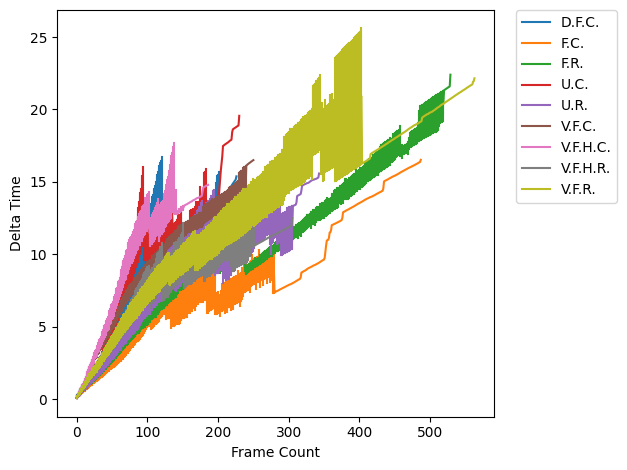

In [27]:
fig, ax = plt.subplots()

for i,[method, group] in enumerate(df_all.groupby(['M'])):
    # group by 'frame_count' column
    sns.lineplot(data=group, x="Frame Count", y="Delta Time",err_style="bars", ci=68, label=method, )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig(f"{root_dir}/data_analysis/plotting/delta_time_vs_frame_count_hue_nbots.png", dpi=300)


In [28]:
# df_all.groupby(['method','experiment_ID'])
for i,[method, group] in enumerate(df_all.groupby(['Method', 'Experiment Id'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    # group by 'frame_count' column
    count_group = group.groupby(['Frame Count'])
    # plot mean of 'area_percent' against 'frame_count' 
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])

i:  0 Method:  ('Decision Frontier Closest', 8) Group:  (197, 28)
i:  1 Method:  ('Decision Frontier Closest', 9) Group:  (202, 28)
i:  2 Method:  ('Decision Frontier Closest', 10) Group:  (161, 28)
i:  3 Method:  ('Decision Frontier Closest', 11) Group:  (227, 28)
i:  4 Method:  ('Decision Frontier Closest', 12) Group:  (125, 28)
i:  5 Method:  ('Decision Frontier Closest', 13) Group:  (121, 28)
i:  6 Method:  ('Decision Frontier Closest', 14) Group:  (98, 28)
i:  7 Method:  ('Decision Frontier Closest', 15) Group:  (89, 28)
i:  8 Method:  ('Frontier Closest', 0) Group:  (488, 28)
i:  9 Method:  ('Frontier Closest', 1) Group:  (278, 28)
i:  10 Method:  ('Frontier Closest', 2) Group:  (280, 28)
i:  11 Method:  ('Frontier Closest', 3) Group:  (185, 28)
i:  12 Method:  ('Frontier Closest', 4) Group:  (134, 28)
i:  13 Method:  ('Frontier Closest', 5) Group:  (105, 28)
i:  14 Method:  ('Frontier Closest', 6) Group:  (126, 28)
i:  15 Method:  ('Frontier Closest', 7) Group:  (196, 28)
i:  16